# Galaxy SDSS similarity matrix

04 April 2016 - <mquartulli@vicomtech.org>

Is the data file there?

In [18]:
! ls -l

total 656
-rw-r--r--@ 1 marcoq  staff  321837 Apr  4 16:45 galaxies_sdss.csv
-rw-r--r--  1 marcoq  staff    7502 Apr  4 16:58 galaxy_sdss_similarity_matrices.ipynb
-rw-r--r--  1 marcoq  staff      14 Apr  4 15:33 requirements.txt
drwxr-xr-x  7 marcoq  staff     238 Apr  4 15:13 venv


# Read CSV data

Data from the SDSS Catalog 

* <http://skyserver.sdss.org>

In [10]:
import pandas

In [16]:
df = pandas.read_csv('/Users/marcoq/Desktop/bse_ts_2016/galaxies_sdss.csv')

In [14]:
df.head()

,objID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z
0,1237648674510995691,21.35560,19.96498,19.38107,19.12813,18.72835
1,1237648674510995704,20.85371,19.17773,18.38273,18.06475,17.67640
2,1237648674511847548,21.47003,20.11163,19.09579,18.55508,18.30263
3,1237648674512109722,20.05618,19.04180,18.51390,18.18192,18.07660
4,1237648674512109812,22.91436,20.95754,19.26978,18.76397,18.39173


The attributes:

* `psfMag_u`: Point Spread Function Magnitude in the U band
* `psfMag_g`: Point Spread Function Magnitude in the G band
* `psfMag_r`: Point Spread Function Magnitude in the R band	
* `psfMag_i`: Point Spread Function Magnitude in the I band
* `psfMag_z`: Point Spread Function Magnitude in the Z band

# Data filtering

In [24]:
df.shape

(5000, 6)

In [32]:
df[(df['psfMag_u']>=0) & (df['psfMag_g']>=0)].shape

(4967, 6)

In [36]:
df = df[(df['psfMag_u']>=0) & (df['psfMag_g']>=0)].set_index('objID')

In [40]:
df.head()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z
objID,,,,,
1237648674510995691,21.35560,19.96498,19.38107,19.12813,18.72835
1237648674510995704,20.85371,19.17773,18.38273,18.06475,17.67640
1237648674511847548,21.47003,20.11163,19.09579,18.55508,18.30263
1237648674512109722,20.05618,19.04180,18.51390,18.18192,18.07660
1237648674512109812,22.91436,20.95754,19.26978,18.76397,18.39173


# Plot data

In [21]:
%matplotlib inline

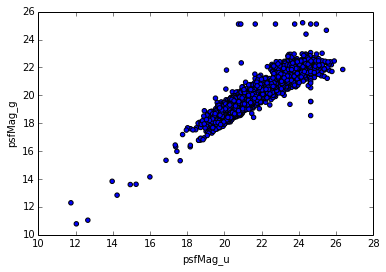

In [41]:
df.plot(x='psfMag_u', y='psfMag_g',kind='scatter')

In [42]:
from pandas.tools.plotting import scatter_matrix

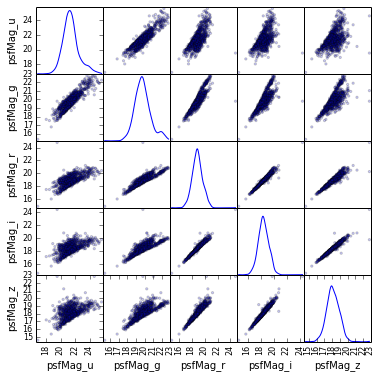

In [44]:
_ = scatter_matrix(df.sample(n=1000), alpha=0.2, figsize=(6, 6), diagonal='kde')

# Compute similarities

In [47]:
import sklearn.metrics.pairwise

In [48]:
dist = sklearn.metrics.pairwise.euclidean_distances(df.values)

In [49]:
dist.shape

(4967, 4967)

In [57]:
import matplotlib.pylab

In [58]:
matplotlib.pylab.imshow?

<matplotlib.colorbar.Colorbar instance at 0x11102a7a0>

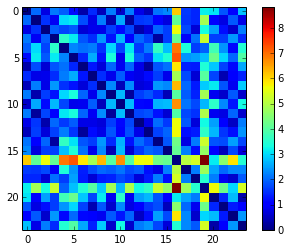

In [60]:
matplotlib.pylab.imshow(dist[:24,:24], interpolation='nearest')
matplotlib.pylab.colorbar()

# Extract outliers by integrating the similarity matrix?

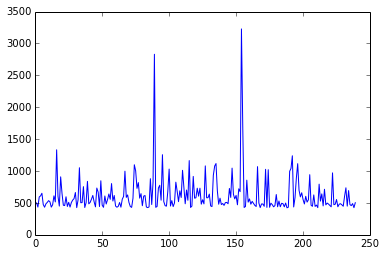

In [64]:
matplotlib.pylab.plot(dist[:240,:240].sum(axis=0))

In [66]:
df['mean_dist'] = dist.sum(axis=0)

In [67]:
df.head()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,mean_dist
objID,,,,,,
1237648674510995691,21.35560,19.96498,19.38107,19.12813,18.72835,10273.786257
1237648674510995704,20.85371,19.17773,18.38273,18.06475,17.67640,9722.959673
1237648674511847548,21.47003,20.11163,19.09579,18.55508,18.30263,9015.942022
1237648674512109722,20.05618,19.04180,18.51390,18.18192,18.07660,11561.415243
1237648674512109812,22.91436,20.95754,19.26978,18.76397,18.39173,12861.860921


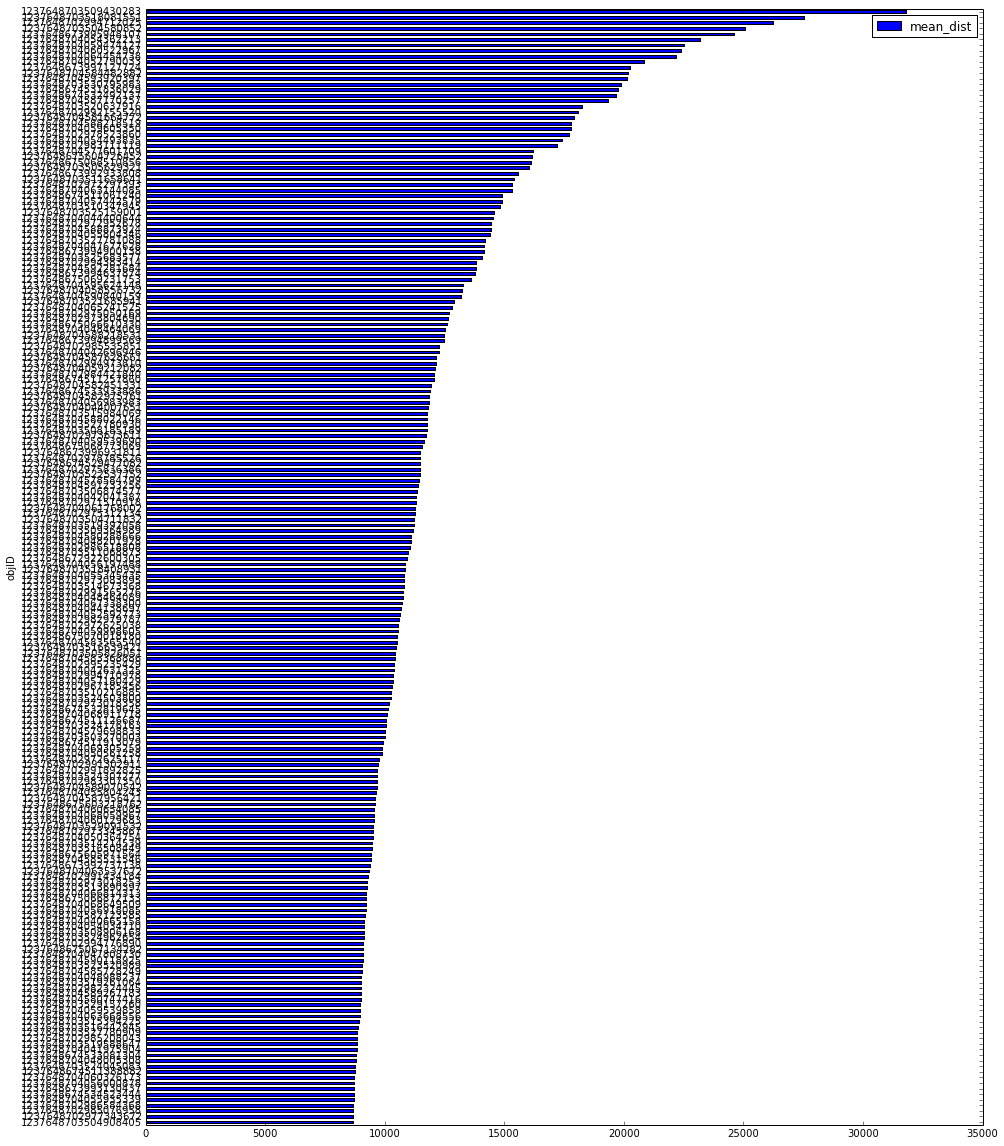

In [77]:
df.sample(n=200).sort('mean_dist').plot(figsize=(15,20), kind='barh',y='mean_dist')